Connexion au Drive Google

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path='/content/drive/MyDrive/python/photo'

Lister les sous-dossiers qui retourne la liste des fichiers dans le dossier path

In [ ]:
import os
os.listdir(data_path)

['khalil', '.ipynb_checkpoints', 'wajih']

In [ ]:
classe_path=os.path.join(data_path,'wajih') 

In [ ]:
classe_path

'/content/drive/MyDrive/python/photo/wajih'

Lister les noms des fichiers dans le dossier classe_path ?

Nommer la liste obtenue fichiers

In [ ]:
fichiers=os.listdir(classe_path)

In [ ]:
fichiers

['wajih1.jpg', 'wajih2.jpg', 'wajih3.jpg', 'wajih4.jpg']

La liste obtenue contizent des noms des fichiers d'images dans le dossier classe_path.

Composer le chemin de la première image de la liste fichiers

Lui donner le nom image_path

In [ ]:
image_path=os.path.join(classe_path, fichiers[0]) 
image_path

'/content/drive/MyDrive/python/photo/wajih/wajih1.jpg'

**1.2. Travailler avec les images**

Lire une image

Note: Utiliser la fonction imread() de module skimage.io

Donner le nom I à ll'image chargée en mémoire

In [ ]:
from skimage.io import imread

I=imread(image_path)


Propriétés de l'objet image

Afficher le type de l'image chargée en mémoire I

In [ ]:
type(I)

numpy.ndarray

Afficher le shape de l'image chargée en mémoire I

In [ ]:
I.shape

(720, 1280, 3)

Afficher le type des données (les niveaux de gris) de l'image I

In [ ]:
I.dtype

dtype('uint8')

Afficher une image sur la console

Note :  Utiliser la fonction imshow(image, cmap='gray') de module matplotlib.pyplot

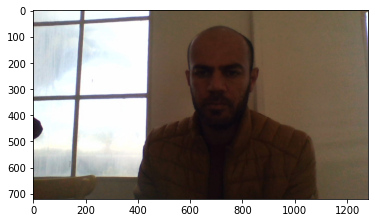

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(I, cmap='gray')

Opérations de base sur une image

In [ ]:
# rendre l'image un vecteur avec la fonction reshape()
import numpy as np
I1 = np.reshape(I,(720,1280,3))

In [ ]:
# rendre l'image un vecteur avec la fonction reshape()
I1

array([[[228, 226, 231],
        [228, 226, 231],
        [227, 225, 230],
        ...,
        [119, 108,  80],
        [121, 107,  78],
        [121, 108,  76]],

       [[228, 226, 231],
        [227, 225, 230],
        [227, 225, 230],
        ...,
        [122, 111,  83],
        [126, 112,  85],
        [128, 114,  85]],

       [[228, 226, 229],
        [227, 225, 228],
        [227, 225, 228],
        ...,
        [120, 108,  84],
        [121, 109,  85],
        [123, 111,  85]],

       ...,

       [[ 44,  34,  22],
        [ 44,  34,  22],
        [ 46,  34,  22],
        ...,
        [107,  91,  75],
        [105,  89,  73],
        [104,  88,  72]],

       [[ 47,  35,  23],
        [ 47,  35,  23],
        [ 46,  34,  22],
        ...,
        [106,  90,  74],
        [102,  89,  72],
        [101,  88,  71]],

       [[ 47,  35,  23],
        [ 47,  35,  23],
        [ 47,  35,  23],
        ...,
        [106,  90,  74],
        [102,  89,  72],
        [100,  87,  70]]

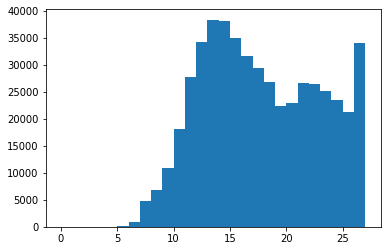

In [ ]:
# rendre l'image un vecteur avec la fonction flatten()
x, y, patches = plt.hist(I1.flatten(), bins=range(28))
plt.show()


720 405


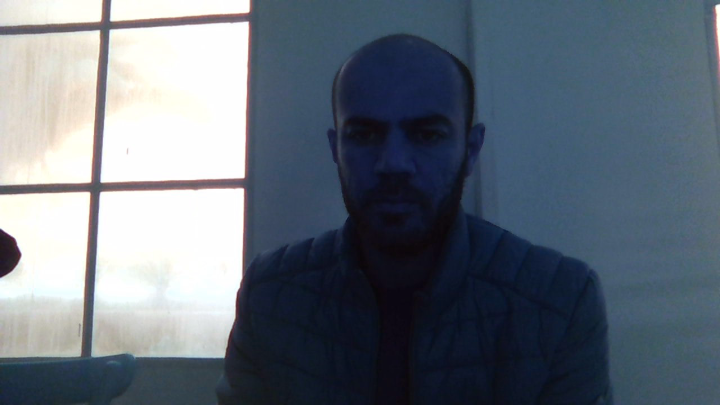

In [ ]:
# Changer la resolution de l'image
# Utiliser la fonction resize
import imutils
import cv2
from google.colab.patches import cv2_imshow
from skimage.transform import resize
I1 = imutils.resize(I1, width=720)
(h, w) = I1.shape[:2]
print(w,h)
cv2_imshow(I1)


**2. Classification des images**

**2.1. Charger les images à partir de Google Drive**

In [ ]:
import os

data_path='/content/drive/MyDrive/python/Dataset/wajih'
images=[]
labels=[]
for classe_name in os.listdir(data_path):
    classe_path = os.path.join(data_path, classe_name)
for file  in os.listdir(classe_path):
    image_path = os.path.join(classe_path, file)
    images.append(image_path)
    labels.append(classe_name)

**2.2. Diviser les données en entrée et sortie**

In [ ]:
X=images
y=labels

**2.3. Diviser les données en train et test**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, train_size=0.7, stratify=y)

In [ ]:
y_train

In [ ]:
y_test

['wajih1.jpg',
 'khalil01.jpg',
 'wajih3.jpg',
 'wajih3.jpg',
 'wajih4.jpg',
 'wajih4.jpg',
 'khalil02.jpg',
 'wajih2.jpg',
 'khalil01.jpg',
 'wajih2.jpg',
 'wajih3.jpg',
 'wajih2.jpg',
 'khalil01.jpg',
 'khalil03.jpg',
 'wajih4.jpg',
 'khalil03.jpg',
 'wajih1.jpg',
 'wajih1.jpg',
 'khalil02.jpg',
 'khalil02.jpg']

**2.4. Traitement des données de train d'entrée**

In [ ]:
from skimage.io import imread
import numpy as np
X_train_=[]
for image_path in X_train:
  I=imread(image_path)
  x=I.flatten()
  X_train_.append(x)
X_train_=np.array(X_train_)
X_train_

**2.5. Apprentissage de classifieur**

Apprendre le modèle KNN avec X_train_ et y_train

In [ ]:
from sklearn.neighbors  import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_,y_train)

KNeighborsClassifier(n_neighbors=2)

**2.6. Traitement des données de test d'entrée**

In [3]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
from skimage.io import imread
import numpy as np
X_test_=[]
for image_path in X_test:
  I=imread(image_path)
  x=I.flatten()
  X_test_.append(x)
X_test_=np.array(X_test_)
X_test_

**2.7. Evaluation du classifieur**

Prédire les labels y_test_predicted à partir des données de test X_test_

In [ ]:
y_test_predicted=knn.predict(X_test_)
y_test_predicted

array(['KT02.jpg', 'KT01.jpg', 'KT02.jpg', 'KT01.jpg'], dtype='<U8')

Afficher les mesures de performance

Score accurracy

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("accuracy=%.2f" % (accuracy_score(y_test, y_test_predicted)*100))

accuracy=25.00


Matrice de confusion

In [ ]:
M=confusion_matrix(y_test, y_test_predicted)
M

array([[0, 1, 0],
       [1, 1, 0],
       [1, 0, 0]])

In [ ]:
knn.classes_

array(['KT01.jpg', 'KT02.jpg', 'KT03.jpg'], dtype='<U8')

In [ ]:
import pandas as pd

pd.DataFrame(M,
             index=knn.classes_,
             columns=knn.classes_)

,KT01.jpg,KT02.jpg,KT03.jpg
KT01.jpg,0,1,0
KT02.jpg,1,1,0
KT03.jpg,1,0,0


Rappel (recall) et précision apr classe

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

    KT01.jpg       0.00      0.00      0.00         1
    KT02.jpg       0.50      0.50      0.50         2
    KT03.jpg       0.00      0.00      0.00         1

    accuracy                           0.25         4
   macro avg       0.17      0.17      0.17         4
weighted avg       0.25      0.25      0.25         4



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
